<a href="https://colab.research.google.com/github/LauraCorredor7/Finanzas-Computacionales/blob/main/Taller_3_Laura%26Santiago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Librerías
import pandas as pd 
import numpy as np 
import seaborn as sns
import scipy.stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
import cvxpy as cp
!pip install yfinance
import yfinance as yf
!pip install fitter
from fitter import Fitter, get_common_distributions, get_distributions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for fitter: filename=fitter-1.5.1-py3-none-any.whl size=25596 sha256=67a7ee360a0634c002861c7bb5e50a1818fdad22a82931949aeaceab2ade1115
  Stored in directory: /root/.cache/pip/wheels/40/65/62/57b872ba7af36e70111b1f67cffe76f97c747804aff7665ccb
Successfully built fitter


1. Escoja una acción de su preferencia. Con la información histórica para el periodo Ene-
2016 a Dic-2021, estime los parámetros μ y σ.

a. Con estos parámetros construya 10.000 trayectorias del precio que sigan el proceso
estocástico:

St = St−1 exp{(μ– 1/2σ^2)dt + σd Wt}

Donde: Wt es un proceso estándar de Wiener. Presente gráficamente las primeras 20 trayectorias del proceso para un tiempo de un año (T=1).
b. Presente los histogramas de los precios y retornos al final del periodo (T=1).
c. Demuestre que el valor terminal del precio simulado de la acción converge a ST exp{(μ– 1/2σ2)}.

d. Calcule la probabilidad de que los retornos de la acción sean inferiores a cero.

In [3]:
activos = ["T"]
precios = yf.download(activos,start="2016-01-01",end="2021-12-31")
precios = precios.loc[:,"Adj Close"].dropna()
retornos = np.log(precios/precios.shift(1)).dropna()
mu = retornos.mean()
sigma = retornos.std()

[*********************100%***********************]  1 of 1 completed


In [4]:
def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    St = S # {"S":S} 
    return St

In [5]:
T = 5
S0 = 100
NS = 10000
M = 252
St = PathsGBM(S0,mu,sigma,T,NS,M)
St
#St = St["S"]

array([[100.        ,  99.80668905,  99.45383332, ...,  97.53378316,
         97.78391414,  97.93155626],
       [100.        , 100.11516471, 100.30820277, ..., 102.86767215,
        102.97674823, 102.89188224],
       [100.        ,  99.8995734 ,  99.61714355, ..., 102.22121788,
        102.66947052, 102.5284973 ],
       ...,
       [100.        , 100.31526738, 100.25547698, ..., 100.38484655,
        100.36669425, 100.49985281],
       [100.        ,  99.99475457, 100.2498333 , ...,  97.33973928,
         97.70005207,  97.7807612 ],
       [100.        ,  99.98351999,  99.73461617, ..., 102.06487724,
        102.21772947, 102.30752599]])

In [6]:
T1 = 1
S0 = 50
NS1 = 20
M1 = 252
St1 = PathsGBM(S0,mu,sigma,T1,NS1,M1)
St1

array([[50.        , 50.02833565, 50.1187374 , ..., 51.25245624,
        51.27061364, 51.25993679],
       [50.        , 49.96219299, 50.06581917, ..., 50.46065353,
        50.42381987, 50.43969437],
       [50.        , 50.04627423, 50.05920714, ..., 51.16149029,
        51.25672211, 51.29372945],
       ...,
       [50.        , 50.05064092, 50.03036428, ..., 50.12176782,
        50.1478851 , 50.11534005],
       [50.        , 50.05696274, 50.07774753, ..., 50.12718385,
        50.0898996 , 50.08731098],
       [50.        , 50.08900825, 50.08232719, ..., 50.12295861,
        50.13541628, 50.12964882]])

Text(0, 0.5, 'S(t)')

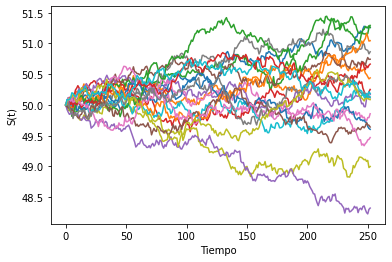

In [7]:
plt.plot(np.transpose(St1)) 
plt.xlabel("Tiempo")
plt.ylabel("S(t)")

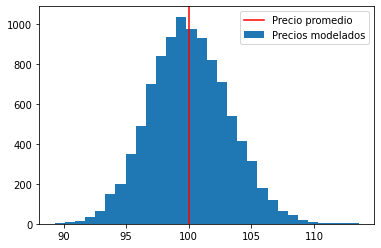

In [8]:
# Precio modelado en T
plt.hist(St[:,-1], bins=30, label='Precios modelados')
plt.axvline(St[:,-1].mean(), color='r', label='Precio promedio')
plt.legend()

In [9]:
t_0 = 0
k = 5.5 # hacia donde va a converger
mu1 = mu
sigma = 0.3 #variabilidad del 30% 
t = np.linspace(t_0,T,M1) # time axis
dt = np.mean(np.diff(t))
y = np.zeros(M1)

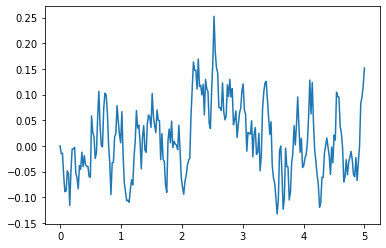

In [10]:
y0 = np.random.normal(0,1) # initial condition
drift = lambda y,t: k*(mu1-y) # define drift term, google to learn about lambda
diffusion = lambda y,t: sigma # define diffusion term

noise = np.random.normal(0,1,M1)*np.sqrt(dt) 
# solve SDE
for i in range(1,M1):
 y[i] = y[i-1] + drift(y[i-1],i*dt)*dt + diffusion(y[i-1],i*dt)*noise[i]

plt.plot(t,y);

Fitting 2 distributions: 100%|██████████| 2/2 [00:00<00:00,  6.49it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,1616.424093,886.275213,125.730299,inf,0.095569,1.902492e-12
norm,1631.607181,873.875298,132.518995,inf,0.095106,2.487477e-12


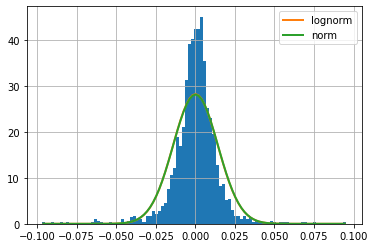

In [11]:
frp = Fitter(retornos, distributions= ['norm','lognorm'])
frp.fit()
emp_dist1 = frp.get_best(method = 'sumsquare_error')
emp_dist1
frp.summary()

2. Con las acciones de: JPM, MCD, META, WMT

a. Construir el portafolio de mínima varianza global de Markowitz. Presentar el grafico de
pesos y sus medidas de retorno esperado y volatilidad

b. Calcular el VaR del portafolio para los niveles de confianza del 95% y 99%. Usar el modelo
estándar o paramétrico

c. Calcular el VaR del portafolio para los niveles de confianza del 95% y 99%. Usar el modelo
de estimación histórica

d. Calcular el VaR del portafolio para los niveles de confianza del 95% y 99%. Usar el modelo
de simulación

In [12]:
# Date range
start = '2010-12-31'
end = '2021-12-31'
# Tickers of assets
assets = ['JPM','MCD','META','WMT']
precios = yf.download(assets, start = start, end = end,interval='1Mo')['Adj Close'].dropna()
retornos = np.log(precios/precios.shift(1)).dropna()
mu = retornos.mean()
cov = retornos.cov()
var = np.diag(cov)
sigma = np.sqrt(var)
n = len(mu)

[*********************100%***********************]  4 of 4 completed


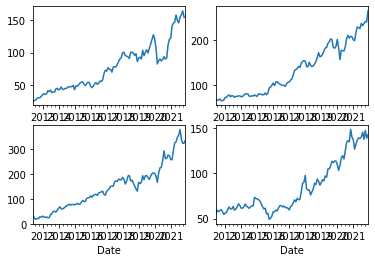

In [13]:
plt.subplot(2, 2, 1)
precios['JPM'].plot()
plt.subplot(2, 2, 2)
precios['MCD'].plot()
plt.subplot(2, 2, 3)
precios['META'].plot()
plt.subplot(2, 2, 4)
precios['WMT'].plot()
plt.show()

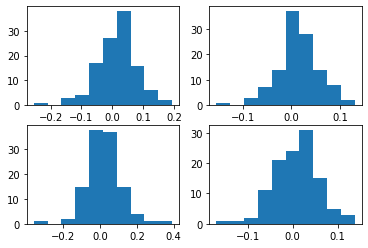

In [14]:
#Retornos
plt.subplot(2, 2, 1)
plt.hist(retornos['JPM'],bins=10)
plt.subplot(2, 2, 2)
plt.hist(retornos['MCD'],bins=10)
plt.subplot(2, 2, 3)
plt.hist(retornos['META'],bins=10)
plt.subplot(2, 2, 4)
plt.hist(retornos['WMT'],bins=10)
plt.show()

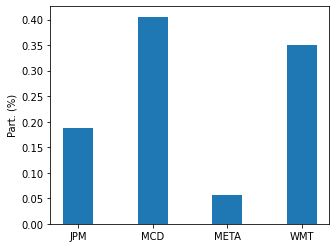

In [15]:
# Portafolio de mínima varianza global de Markowitz
def pmvg(cov, ones):  
    cov_inv = np.linalg.inv(cov)  
    w = np.dot(cov_inv, ones)  #pesos de
    return w / np.sum(w) 

unos = np.repeat(1,n)
wpmvg = pmvg(cov, unos)

fig = plt.figure(figsize = (5, 4))
plt.bar(assets, wpmvg, width = 0.4)
plt.ylabel("Part. (%)")
plt.show()

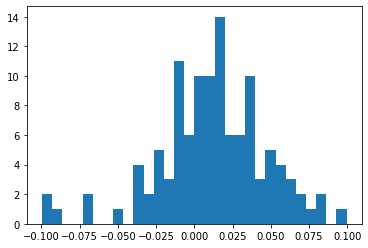

In [16]:
#VAR
w = cp.Variable(n)
risk = cp.quad_form(w,cov)
objective = cp.Minimize(risk)
constraints = [cp.sum(w)==1, w>=0]
optim = cp.Problem(objective,constraints)
optim.solve()
wpmvg = w.value
ret_port = retornos @ wpmvg 
plt.hist(ret_port,bins=30)
plt.show()

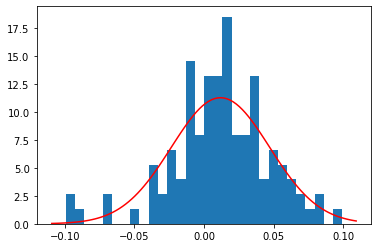

In [17]:
rp = ret_port.mean()
sigmap = ret_port.std()
rp, sigmap
plt.hist(ret_port,bins=30,density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin,xmax,100)
px = norm.pdf(x,rp,sigmap)
plt.plot(x,px,'r')

In [18]:
# Delta VaR
alpha = 0.01
VaRp = rp - norm.ppf(1-alpha)*sigmap
rp, sigmap, VaRp

(0.011856937098970673, 0.03539021095578236, -0.07047300491987049)

In [19]:
VaRp*np.sqrt(10)

-0.22285520910304277

In [20]:
VaRH = np.percentile(ret_port,1) # 1 para el 99% de confianza
VaRH

-0.09338406703918677

In [21]:
# Delta VaR
alpha1 = 0.05
VaRp1 = rp - norm.ppf(1-alpha1)*sigmap
rp, sigmap, VaRp1

(0.011856937098970673, 0.03539021095578236, -0.04635477975022567)

In [22]:
VaRp1*np.sqrt(10)

-0.1465866844461642

In [23]:
# VaR Historico
VaRH1 = np.percentile(ret_port,1) # 1 para el 95% de confianza
VaRH1

-0.09338406703918677

3. Con la información de los registros de pérdidas de la entidad TuDeuda Ltda:

a. Realizar un análisis exploratorio de los datos (media, desviación, curtosis, simetría).
Apoye su análisis con gráficos (histogramas y QQplot).

b. ¿Qué puede decir de la distribución de los datos de pérdidas de la entidad?
c. Ajuste diferentes funciones de distribución de probabilidad a los datos. ¿Qué distribución
recomienda?

d. Si la frecuencia de los eventos de perdidas sigue una distribución Binomial con parámetros
N=12 y p=0.2, calcule la perdida esperada.

In [25]:
# Se indexa el excel al colab
df=pd.read_excel('DataLoss.xlsx')

In [26]:
mu = df.mean()
cov = df.cov()
var = np.diag(cov)
sigma = np.sqrt(var)
retorno_loss = np.log(df['Loss']/df['Loss'].shift(1)).dropna()
mu_2 = retorno_loss.mean()
sigma_2 = retorno_loss.std()

In [27]:
df.describe()

,Loss
count,252.000000
mean,9983.123016
std,5591.237909
min,4.000000
25%,5244.250000
50%,10415.500000
75%,14336.750000
max,19948.000000


La distribución de los datos es asimétrica, tiene un promedio de los datos 9.983.

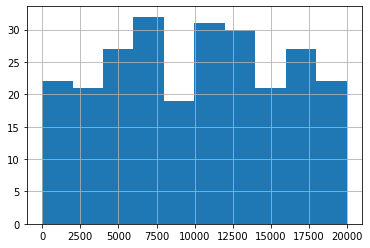

In [28]:
df['Loss'].hist()

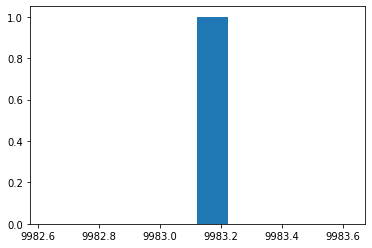

In [29]:
plt.hist(mu,bins=10)
plt.show()

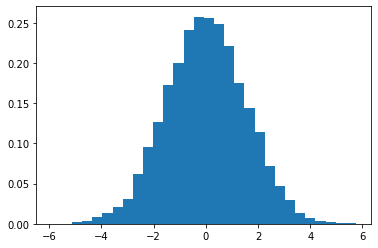

In [30]:
mu1 = mu_2
sd = sigma_2
simulations = 10000
loss = np.random.normal(mu1, sd, simulations)
plt.hist(loss,density=True,bins=30)
plt.show()
     

Fitting 4 distributions: 100%|██████████| 4/4 [00:00<00:00,  7.88it/s]


{'lognorm': {'s': 0.01939772148455386,
  'loc': -79.28306445431983,
  'scale': 79.26782266973305}}

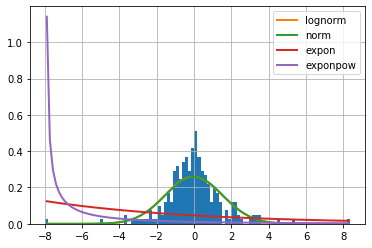

In [31]:
fa = Fitter(retorno_loss, distributions= ['norm','lognorm','expon','exponpow'])
fa.fit()
fa.summary()
emp_d = fa.get_best(method = 'sumsquare_error')
emp_d

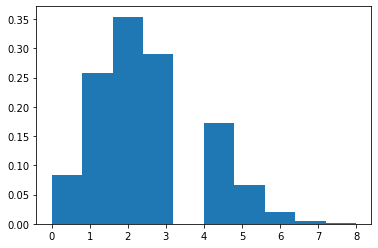

In [32]:
N=12
p=0.2
simulations = 10000
biloss = np.random.binomial(N,p,simulations)
plt.hist(biloss,density=True)
plt.show()

4. Escoja dos activos que presenten un comportamiento de reversión a la media tipo OU.

a. Construya la gráfica de las series históricas de los precios y/o valores

b. Presente los resultados de las pruebas de estacionariedad de Dickey-Fuller (ADF)

c. Construya 100 trayectorias o simulaciones para cada activo con periodicidad mensual y
con duración T=1.


In [33]:
activos = ["T"]
data = yf.download(activos,start="2010-01-01",end="2021-12-31")
precios3 = data.loc[:,"Adj Close"].dropna()
retornos3 = np.log(precios3/precios3.shift(1)).dropna()
mu3 = retornos.mean()
sigma3 = retornos.std()

[*********************100%***********************]  1 of 1 completed


In [34]:
import statsmodels.api as sm
from statsmodels.tsa.api import acf, pacf, graphics
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

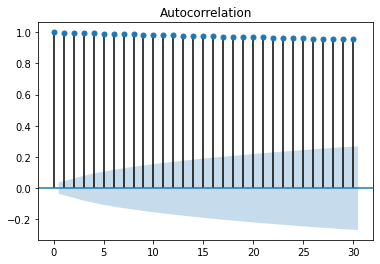

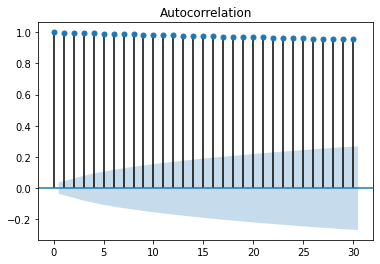

In [35]:
plot_acf(precios3, lags=30)

In [36]:
# Test Dickey-Fuller
# Prueba 
pruebadf1 = adfuller(precios3)  
pruebadf1

(-1.9275469449915865,
 0.31921516485368245,
 13,
 3006,
 {'1%': -3.4325272764323667,
  '5%': -2.862501980355106,
  '10%': -2.567282087313508},
 -1127.0605853627221)

In [40]:
activos = ["GBP=X"]
data = yf.download(activos,start="2010-01-01",end="2021-12-31")
precios4 = data.loc[:,"Adj Close"].dropna()
retornos4 = np.log(precios4/precios4.shift(1)).dropna()
mu4 = retornos.mean()
sigma4 = retornos.std()

Failed to get ticker 'USD/GPB' reason: Expecting value: line 1 column 1 (char 0)


Exception in thread Thread-38:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/multitasking/__init__.py", line 104, in _run_via_pool
    return callee(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/yfinance/multi.py", line 201, in _download_one_threaded
    keepna, timeout)
  File "/usr/local/lib/python3.7/dist-packages/yfinance/multi.py", line 218, in _download_one
    timeout=timeout)
  File "/usr/local/lib/python3.7/dist-packages/yfinance/base.py", line 168, in history
    end = utils._parse_user_dt(end, tz)
  File "/usr/local/lib/python3.7/dist-packages/yfinance/utils.py", line 157, in _parse_user_dt
    dt = _tz.timezone(exchange_tz).localize(dt)
  File "/usr/local/lib/python3.7/dist-packages/pytz/__init__.py", line 168, in timezone
    raise

KeyboardInterrupt: ignored

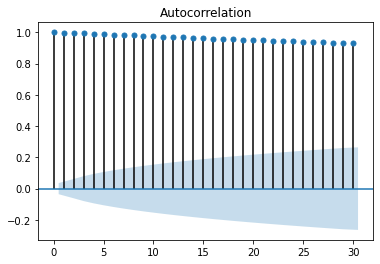

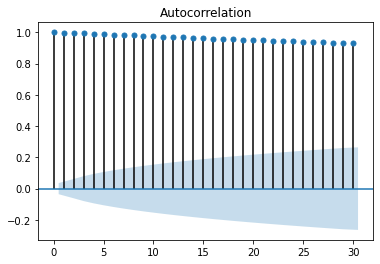

In [38]:
plot_acf(precios4, lags=30)

In [ ]:
# Test Dickey-Fuller
# Prueba 
pruebadf1 = adfuller(precios4)  
pruebadf1